https://data-science-blog.com/blog/2022/04/11/how-to-choose-the-best-pre-trained-model-for-your-convolutional-neural-network/
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [2]:
%pip install fast_ml

  Using cached fast_ml-3.68-py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U efficientnet


  Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the necessary packages
import os
import zipfile
# import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
#from keras import optimizers
from tensorflow.keras import optimizers

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot
import efficientnet.keras as efn

from tensorflow.keras.applications.vgg16 import VGG16


In [2]:
################ Unzip the dataset in the Colab runtime #################
import glob
import zipfile
zip_file_path = "C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/Datensatz.zip"

pathToZip = os.path.join(zip_file_path)

print("unzipping {}".format(pathToZip))

pathToData = "/tmp/Datensatz"
with zipfile.ZipFile(pathToZip, 'r') as zip_ref:
    zip_ref.extractall(pathToData)

# training images
data    = glob.glob(os.path.join(pathToData, "Datensatz/" + "*.jpeg"))
# test images
#test    = glob.glob(os.path.join(pathToData, "Datensatz/test/" + "*.jpg"))

print(pathToData + "/Datensatz/") #/train
print("train    : {} image paths".format(len(data)))
#print("train    : {} image paths".format(len(test)))


unzipping C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/Datensatz.zip
/tmp/Datensatz/Datensatz/
train    : 535 image paths


In [4]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob("/tmp/Datensatz/Datensatz/" + "*.jpeg"): #assuming gif
    im=Image.open(filename)
    
    image_list.append(im)

print("list: ", len(image_list))
print(image_list[0])

list:  535
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2316x2316 at 0x28505B4B5E0>


https://qmul-tinyface.github.io/

In [5]:
import numpy as np
samples = []
for i in range(len(image_list)):
        temp_data = img_to_array(image_list[i])
        # normalize image
        # print("data: ", data)
        # normalize image
        img_norm = cv2.normalize(temp_data, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        # print("norm: ", img_norm)
        # expand dimension to one sample
        # samples.append(expand_dims(img_norm, 0))
        samples.append(array_to_img(img_norm))
       


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8
y = []

for i in range(len(samples)):
    y.append('Dominik')


# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(samples,y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


<PIL.Image.Image image mode=RGB size=1170x2532 at 0x2850660B3A0>


In [7]:
X_train_resized = []
X_val_resized = []

for i in range(len(X_train)):
    X_train_resized.append(X_train[i].resize([224,224]))

for i in range(len(X_valid)):
    X_val_resized.append(X_valid[i].resize([224,224]))

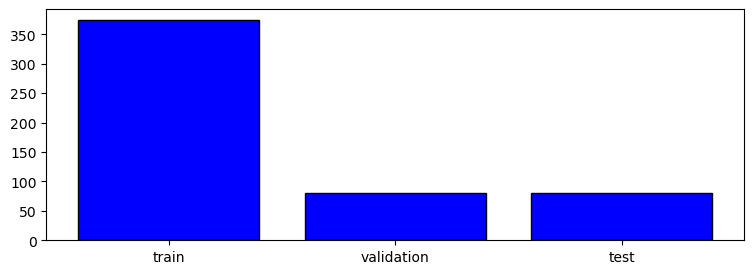

In [8]:
names = ['train', 'validation', 'test']
values = [len(X_train), len(X_valid), len(X_test)]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.show()

In [9]:
for i in range(len(X_train)):
    X_train_resized[i].save(r'C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\face_recognition\data\train\Dominik\image_' +str(i) +'.jpg', 'JPEG')

    
for i in range(len(X_valid)):
    X_val_resized[i].save(r'C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\face_recognition\data\validation\Dominik\image_' +str(i) +'.jpg', 'JPEG')

for i in range(len(X_test)):
    X_test[i].save(r'C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\face_recognition\data\test\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    

In [10]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')

path_train = "data/train/"
train_generator = train_datagen.flow_from_directory(path_train, batch_size = 1, class_mode = 'binary', target_size = (224, 224))
_, _, files_train = next(os.walk("data/train/Dominik"))
number_augmented_train = len(files_train)*3

for i in range(len(files_train)*3):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\face_recognition\data\train\Dominik\augmented_image_'+ str(i)+ '.jpg')



path_validation = "data/validation/"
validation_generator = validation_datagen.flow_from_directory(path_validation, batch_size = 1, class_mode = 'binary', target_size = (224, 224))
_, _, files_validation = next(os.walk("data/validation/Dominik"))
number_augmented_validation = len(files_validation)*2

for i in range(len(files_validation)*2):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\face_recognition\data\validation\Dominik\augmented_image_'+ str(i)+ '.jpg')



Found 374 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


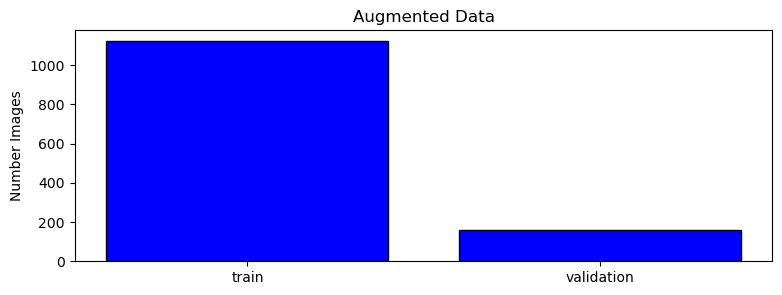

In [11]:
names = ['train', 'validation']
values = [number_augmented_train, number_augmented_validation]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.ylabel('Number Images')
plt.title('Augmented Data')
plt.show()

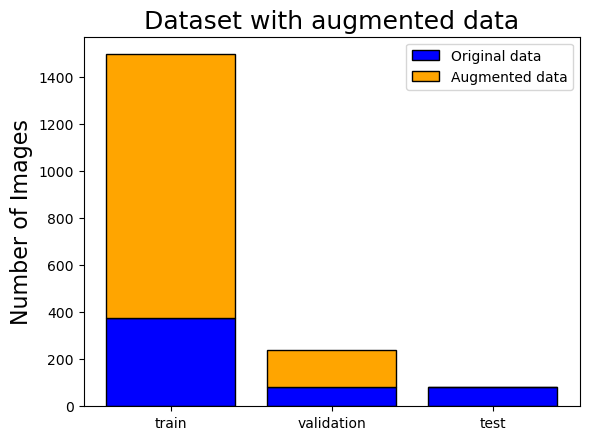

In [12]:
import matplotlib.pyplot as plt
import numpy as np
 
split=['train', 'validation', 'test']
data_origin=['Original data','Augmented data']
pos = np.arange(len(split))
vales_og = [len(X_train), len(X_valid), len(X_test)]
values_augmented = [number_augmented_train, number_augmented_validation, 0]

plt.bar(pos,vales_og,color='blue',edgecolor='black')
plt.bar(pos,values_augmented,color='orange',edgecolor='black',bottom=vales_og)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Dataset with augmented data',fontsize=18)
plt.legend(data_origin)
plt.show()

In [13]:
# Step 2: Loading the Base Model
# sampleImage = []
# for i in range(len(train)):
#     sampleImage.append(cv2.imread(train[i]))
#print("sampleImage: ", sampleImage[2])
#train_dat, train_generator = image_augmentation(sampleImage)

base_model = efn.EfficientNetB7(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [14]:
# Again, let us freeze the layers:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# Step 3: Build the model

x = base_model.output
y = base_model.input
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(y, predictions) #base_model.input

In [16]:
# Step 4: Compile and Fit

model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

Batch-Size: Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the    predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.
-What if the dataset does not divide evenly by the batch size?
    --> This can and does happen often when training a model. It simply means that the final batch has fewer samples than the other batches.

Epochen: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.


Steps_per_epoch: Total number of steps (batches of samples)
            before declaring one epoch finished and starting the
            next epoch. When training with input tensors such as
            TensorFlow data tensors, the default `None` is equal to
            the number of samples in your dataset divided by
            the batch size, or 1 if that cannot be determined. If x is a
            `tf.data` dataset, and 'steps_per_epoch'
            is None, the epoch will run until the input dataset is exhausted.
            When passing an infinitely repeating dataset, you must specify the
            `steps_per_epoch` argument.

In [27]:

array_list_train = []
train_arr = []
for filename in glob.glob("C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/face_recognition/data/train/Dominik/" + "*.jpg"): #assuming gif
    im=Image.open(filename)
   
    #array_list_train.append(img_to_array(im))
    train_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(train_arr))



array_list_val= []
val_arr = []
for filename in glob.glob("C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/face_recognition/data/validation/Dominik/" + "*.jpg"): #assuming gif
    im=Image.open(filename)
    
    #array_list_val.append(img_to_array(im))
    val_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(val_arr))
print(val_arr[0].shape)


list:  1496
list:  240
(1, 224, 224, 3)


In [37]:
train_dir = "data/train/"
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

val_dir = "data/validation/"
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(val_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 1496 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [38]:
eff_history = model_final.fit(train_generator, validation_data = val_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [20]:
# We finally fit the model on our data:

eff_history = model_final.fit(train_generator, validation_data = train_generator, steps_per_epoch = 2, epochs = 10)

Epoch 1/10


TypeError: 'NoneType' object is not callable

In [ ]:
# Importing OpenCV package
import cv2
  
# Reading the image
img = cv2.imread('Photos/cric4.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2.imshow('Detected faces', img)
  
cv2.waitKey(0)